In [186]:
from mazeAgentUtils import * 
%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [211]:
agent = MazeAgent(dx=0.05,mazeType='twoRooms',dt=0.05)
agent.doorsClosed = True
agent.runRat(trainTime=3000,saveHistory=60)
agent.doorsClosed = False
agent.runRat(trainTime=9000,saveHistory=60)


  0%|          | 0/60000 [00:00<?, ?it/s]

  0%|          | 0/180000 [00:00<?, ?it/s]

In [212]:
plotter = Visualiser(agent)
# plotter.plotPlaceField(number=1)
# plotter.plotPlaceField(i=-1, number=0)
anim = plotter.animatePlaceField(number=339)

In [197]:
agent.saveHist[0]


{'t': 0,
 'pos': array([0.2, 0.2]),
 'doorsClosed': True,
 'M': array([[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.]])}

In [83]:
a in ['a','h_','b']

NameError: name 'a' is not defined

In [53]:
# fig, ax = agent.plotMovementHistory()
fig, ax = agent.plotPlaceField(58)
saveFigure(fig,'1%s'%i)
fig, ax = agent.plotPlaceField(298 + 15*56)
saveFigure(fig,'2%s'%i)

fig, ax = agent.plotGridField(8)
saveFigure(fig,'c%s'%i)
fig, ax = agent.plotGridField(16)
saveFigure(fig,'d%s'%i)
fig, ax = agent.plotGridField(32)
saveFigure(fig,'e%s'%i)
fig, ax = agent.plotGridField(64)
saveFigure(fig,'f%s'%i)


NameError: name 'i' is not defined

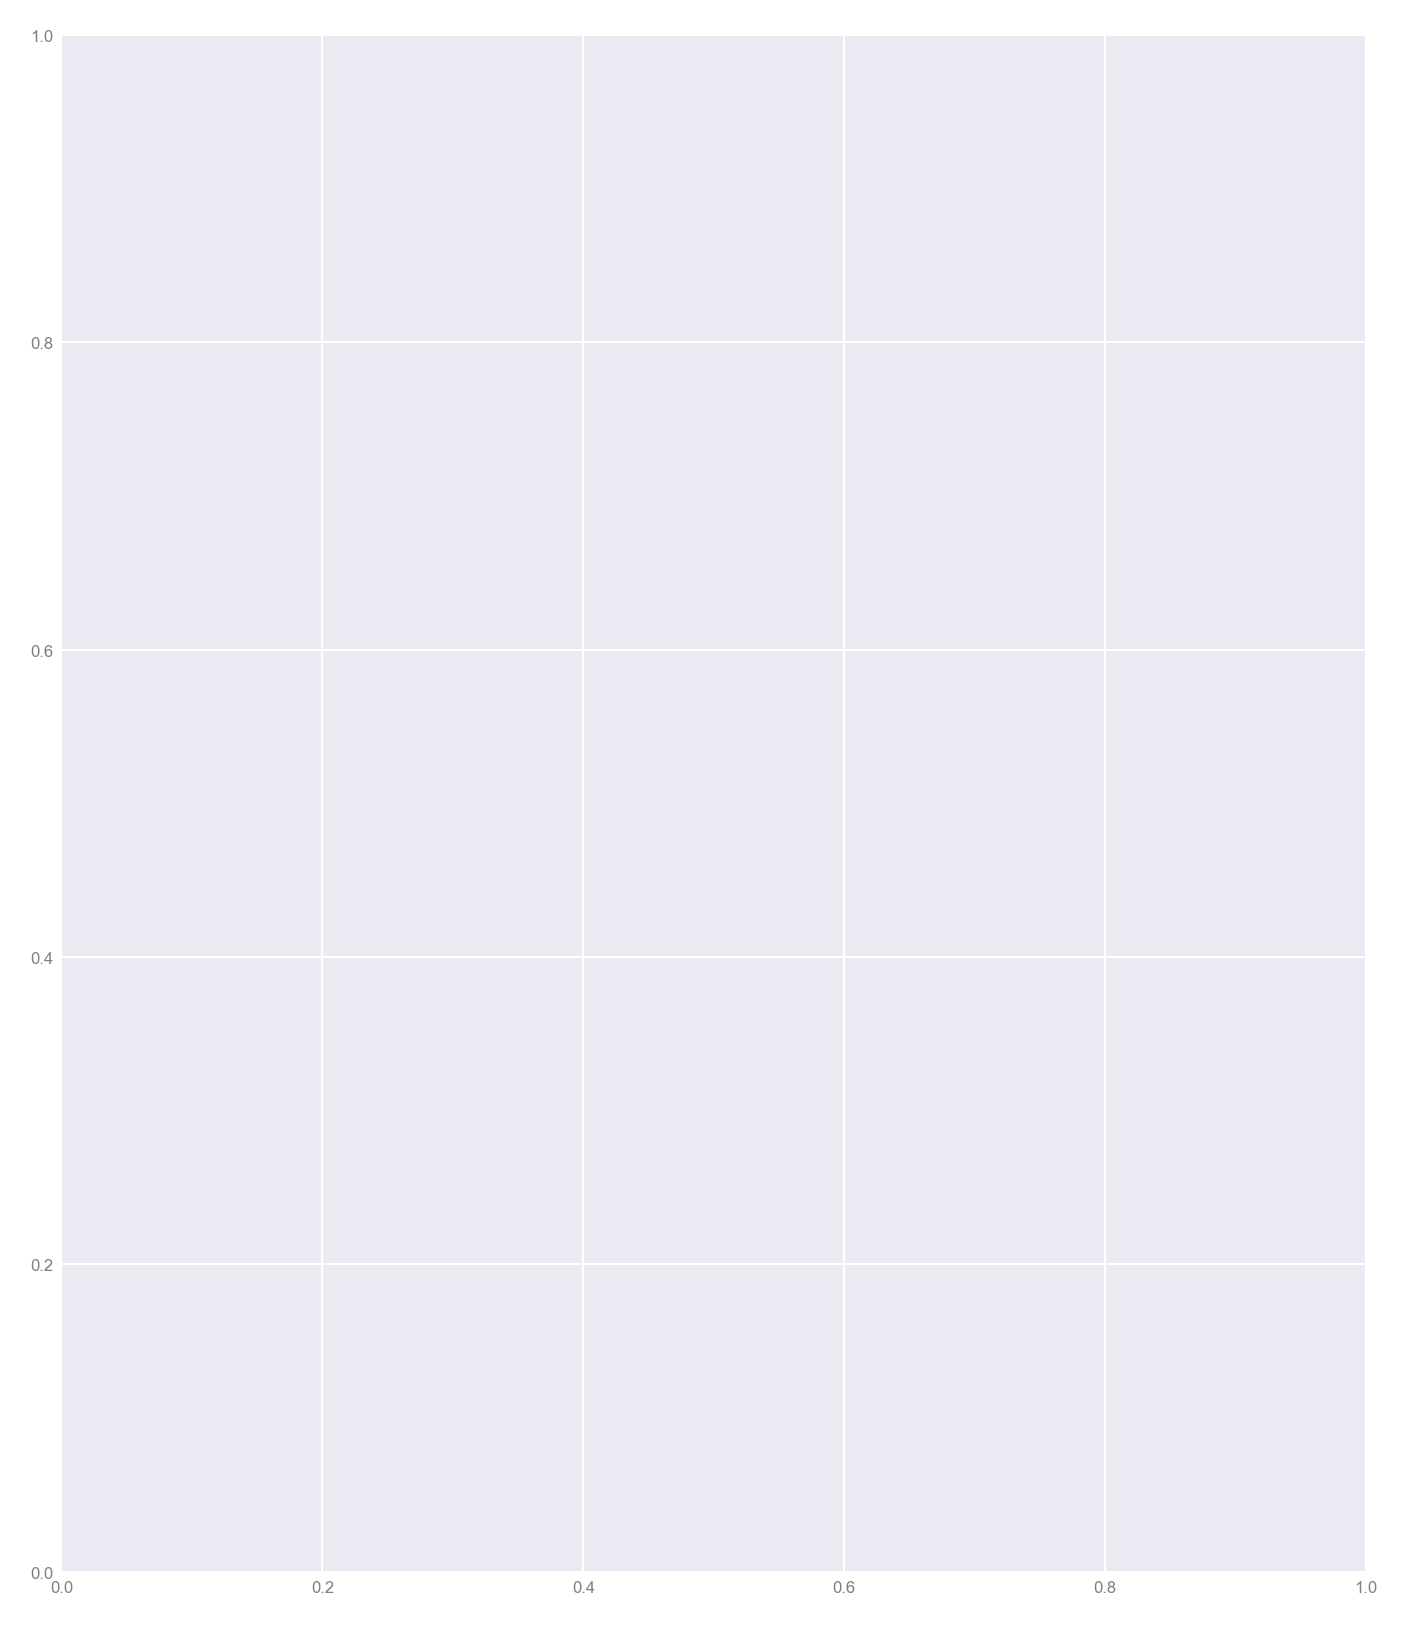

In [48]:
def plotFig(ax,i):
    ax.scatter(np.arange(i), np.arange(i)**2)
def update(i):
    ax.clear()
    plotFig(ax,i)
    if i == 5:
        ax.plot([1,1],[2,1])

fig, ax = plt.subplots()

from matplotlib.animation import FuncAnimation
anim = FuncAnimation(fig, update)
anim.save("./figures/animations/anim.mp4")